**Authors:** Timarkanta , Indu 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DOMAIN:** Automatic Ticketing System.

**CONTEXT:** One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT
leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT
service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is
to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no
business impact. In most of the organisations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit
in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The
assignment of incidents to appropriate IT groups is still a manual process in many of the IT organisations. Manual assignment of incidents is
time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out
ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result
in user satisfaction deterioration / poor customer service.

**Business Domain Value:** In the support process, incoming incidents are analysed and assessed by organisations support teams to
fulfill the request. In many organisations, better allocation and effective usage of the valuable support resources will directly result in
substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT
Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket
categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2
teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and
Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3
teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if
vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard
Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before
ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to
L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents
getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed
for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed
timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help
organizations to reduce the resolving time of the issue and can focus on more productive tasks.

**Pre-Processing, Data Visualisation and EDA**
- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualising different patterns
- Visualising different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

# Pre-Processing, Data Visualisation and EDA

In [85]:
#load required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

In [86]:
#Function for reading .csv file
def csvReader(filename):
     return  pd.read_csv(filename)

In [87]:
data = csvReader('/content/drive/MyDrive/Colab Notebooks/input_data.csv')

# Exploring the given Data files and Understanding the Structure of data

In [6]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8498 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
data.shape

(8500, 4)

In [ ]:
data.describe(include='all')

,Short description,Description,Caller,Assignment group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [ ]:
data.isnull().sum()

Short description    2
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
#find duplicates
data.duplicated(subset=['Short description' ,'Description', 'Assignment group' ]).sum()

591

In [ ]:
data['Assignment group'].nunique()

74

In [ ]:
data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

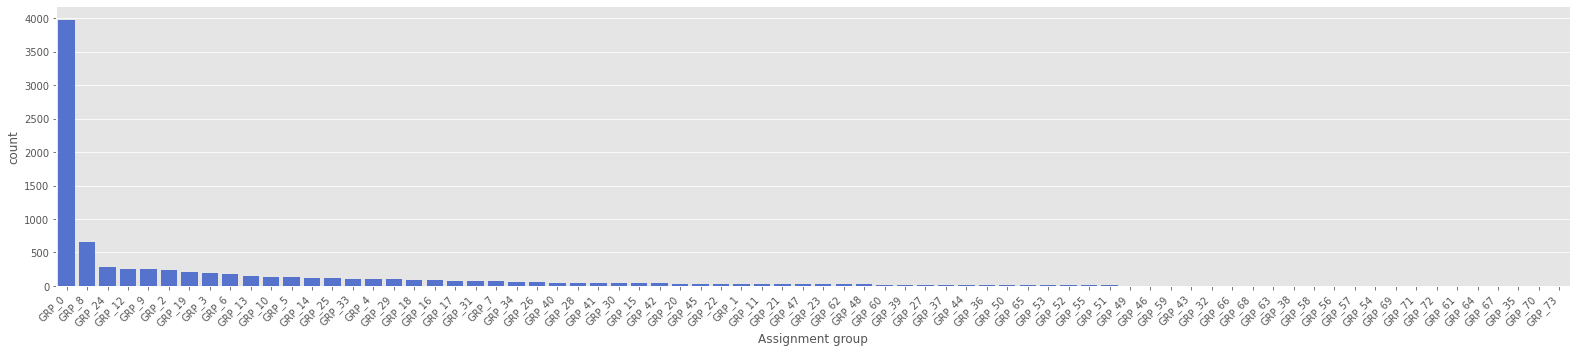

In [ ]:
descending_order = data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=data, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show();

In [ ]:
data['Assignment group'].value_counts().max()

3976

In [ ]:
data['Assignment group'].value_counts().min()

1

In [ ]:
counts = data['Assignment group'].value_counts()
res = data[data['Assignment group'].isin(counts[counts == 1 ].index)]

print("Group with one sample : " ,res['Assignment group'].value_counts().sum())
res['Assignment group'].value_counts()

Group with one sample :  6


GRP_35    1
GRP_61    1
GRP_64    1
GRP_67    1
GRP_70    1
GRP_73    1
Name: Assignment group, dtype: int64

In [ ]:
counts = data['Assignment group'].value_counts()
res = data[data['Assignment group'].isin(counts[counts == 2 ].index)]

print("Group with two sample : " ,res['Assignment group'].value_counts().sum())
res['Assignment group'].value_counts()

Group with one sample :  10


GRP_54    2
GRP_57    2
GRP_69    2
GRP_71    2
GRP_72    2
Name: Assignment group, dtype: int64

In [ ]:
print("The Description")
print("MAX str length          MIN str length ")
print(data['Description'].str.len().max(), "                        ", data['Description'].str.len().min() )

The Description
MAX str length          MIN str length 
13001.0                          1.0


In [ ]:
print("The Short description")
print("MAX str length          MIN str length ")
print(data['Short description'].str.len().max(), "                        ", data['Short description'].str.len().min() )

The Short description
MAX str length          MIN str length 
159.0                          1.0


In [ ]:
len(data['Caller'].str.lower().unique())

2950

In [ ]:
#See if any caller rasied ricket only in any specific group
data['Caller'].groupby(data['Assignment group']).value_counts().nlargest(10)

Assignment group  Caller           
GRP_8             bpctwhsn kzqsbmtp    362
GRP_9             bpctwhsn kzqsbmtp    153
GRP_0             fumkcsji sarmtlhy    132
GRP_5             bpctwhsn kzqsbmtp     96
GRP_6             bpctwhsn kzqsbmtp     89
GRP_0             rbozivdq gmlhrtvp     86
GRP_10            bpctwhsn kzqsbmtp     60
GRP_0             olckhmvx pcqobjnd     54
GRP_8             ZkBogxib QsEJzdZO     54
GRP_0             efbwiadp dicafxhv     45
Name: Caller, dtype: int64

**Inital Data Analysis**
#### Data has 8500 rows & 4 columns
#### Data columns are : 
#### Short description => Feature Column (Dependent Column)
#### Description => Feature Column (Dependent Column)
#### Caller => Feature Column (Dependent Column)
#### Assignment group => Target (Independent Column)
#### Assignment group has 74 unique values
#### Grp_0 has max values 3976
#### There are 6 Assignment Group with one sample 
#### There are 2 rows with data is missing for short description 1 row with null desciption. Will see if a cobination of short description + description solve null value issue. 
#### 2950 unique callers 
#### fumkcsji sarmtlhy has rasied 134 tickets and 132 tickets out of it have been in Group0
#### rbozivdq gmlhrtvp has rasied 87 tickets and 86 of it is in GRP_0
#####olckhmvx pcqobjnd has raised 54 ticekts and all 54 are in GRP_0

In [88]:
# Fixing text that has "curly quotes" applied on top i.e. mojibreaks that arise due to ACII encoding
!pip install ftfy
!pip install langdetect
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
from ftfy import fix_encoding, fix_text, badness
fix_text('machine nÃ£o estÃ¡ funcionando')

'machine não está funcionando'

In [90]:
#lower the text , remove special character , numbers , emails , 
def clean_data(text  ):
    #remove caller name from text
    text=text.lower()
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
    #remove tab breaks
    text = fix_text(text)
    text = re.sub(r"received from:",'',text)
    text = re.sub(r"hi",' ',text)
    text = re.sub(r"hello",'',text)
    text = re.sub(r'\t', '',text)
    
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    #Keep only alpabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [91]:
#Convert 'Short description', 'Description' to str
data[['Short description', 'Description']] = data[['Short description', 'Description']].astype(str)
callers = data['Caller'].str.lower().unique()
data['Short description'] = data['Short description'].apply(clean_data )
data['Description'] = data['Description'].apply(clean_data )


In [92]:
#combine Short description and Description
# apply function
data['Ticket'] = data.apply(lambda x: x['Description'] if x['Description'] ==
                     x['Short description']  else  x['Short description'] +" "+x['Description'], axis=1)

In [93]:
#detect other laguages in data set
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'

data['langue'] = data['Ticket'].apply(detect_my)

In [94]:
data['langue'].value_counts()

en         6680
de          386
sl          332
af          286
it          146
fr          126
no           84
sv           73
nl           63
da           59
es           55
ca           52
unknown      33
pt           20
ro           20
tl           18
pl           17
et           13
cy            8
lv            6
fi            5
so            4
id            3
sq            3
cs            2
sk            2
lt            2
hr            2
Name: langue, dtype: int64

In [95]:
from googletrans import Translator
translator = Translator()

In [96]:
for index, row in data.iterrows():
  #row['trans_ticketlangue'] =  row['Ticket']
  if row['langue'] != 'en' :
    try:
        print(row['langue'])
        print("____")
        row['trans_ticketlangue'] =  translator.translate(row['Ticket']).text
        print('translated : ' + row['trans_ticketlangue'])
        print('Org  : '  + row['Ticket'])
        data.loc[index, 'trans_ticketlangue'] = row['trans_ticketlangue']
        print("-------------")
    except:
        data.loc[index, 'trans_ticketlangue'] = row['Ticket']
  else:
    data.loc[index, 'trans_ticketlangue'] = row['Ticket']

Streaming output truncated to the last 5000 lines.
sv
____
translated : ticket no ticket update
Org  : ticket no ticket update
-------------
de
____
translated : no access to time recording and other network
Org  : kein zugriff auf zeiterfassung und sonstiges netzwerk
-------------
af
____
translated : outlook does not start
Org  : outlook does not start
-------------
fr
____
translated : mobile device activation
Org  : mobile device activation
-------------
es
____
translated : unable to connect to mobile broadband
Org  : unable to connect to mobile broadband
-------------
de
____
translated : mouse has stopped working please replace it
Org  : maus funktioniert nicht mehr richtig bitte ersetzen
-------------
de
____
translated : need a new working mouse
Org  : brauche eine neue funktionierende maus
-------------
de
____
translated : no registration on skype
Org  : keine anmeldung auf skype glich
-------------
pt
____
translated : no response from caller
Org  : no response from caller


In [97]:
data.head()

,Short description,Description,Caller,Assignment group,Ticket,langue,trans_ticketlangue
0,login issue,verified user details employee and manager nam...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...,en,login issue verified user details employee and...
1,outlook,team my meetings skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings skype meetings etc ar...,en,outlook team my meetings skype meetings etc ar...
2,cant log in to vpn,i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn i cannot log on to vpn best,en,cant log in to vpn i cannot log on to vpn best
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,en,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,no,skype error


In [98]:
#Drop Not required columns 
finaldf = data.drop(['Caller' , 'Short description' , 'Description' , 'Caller' , 'Ticket' , 'langue'],  axis = 1 )

In [99]:
finaldf.head()

,Assignment group,trans_ticketlangue
0,GRP_0,login issue verified user details employee and...
1,GRP_0,outlook team my meetings skype meetings etc ar...
2,GRP_0,cant log in to vpn i cannot log on to vpn best
3,GRP_0,unable to access hr tool page
4,GRP_0,skype error


In [100]:
finaldf.loc[finaldf['trans_ticketlangue'].str.strip() == ''].count()

Assignment group      33
trans_ticketlangue    33
dtype: int64

In [101]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 
# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [102]:
#Removing Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
finaldf['trans_ticketlangue'] = finaldf['trans_ticketlangue'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [104]:
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

finaldf['trans_ticketlangue'] = finaldf['trans_ticketlangue'].apply(lemmatize_text)

In [105]:
#find duplicates
finaldf.duplicated(subset=['trans_ticketlangue' , 'Assignment group' ]).sum()
#There are  records which are duplicate

1841

In [106]:
#remove duplicates
finaldf.drop_duplicates(subset=['trans_ticketlangue' ,'Assignment group' ] , keep='first' , inplace=True)

In [107]:
#number of length in each Ticket
finaldf['length']=[len(text) for text in finaldf['trans_ticketlangue']]
#number of words in each Ticket
finaldf['len_words'] = finaldf['trans_ticketlangue'].apply(lambda x: len(x.split(" ")))

In [108]:
finaldf.shape

(6659, 4)

In [109]:
finaldf.loc[finaldf['trans_ticketlangue'] == ''].count()

Assignment group      5
trans_ticketlangue    5
length                5
len_words             5
dtype: int64

In [110]:
  # Replace empty strings with Null
finaldf['trans_ticketlangue'].replace('', np.nan, inplace = True)

In [111]:
finaldf.isnull().sum()

Assignment group      0
trans_ticketlangue    5
length                0
len_words             0
dtype: int64

In [112]:
finaldf.isnull().sum()

Assignment group      0
trans_ticketlangue    5
length                0
len_words             0
dtype: int64

In [113]:
finaldf.dropna(inplace=True)

In [114]:
finaldf.shape

(6654, 4)

In [115]:
data1=finaldf[finaldf['len_words']<2].copy()

In [116]:
data1

,Assignment group,trans_ticketlangue,length,len_words
39,GRP_0,call,4,1
823,GRP_0,boot,4,1
1271,GRP_30,fe,2,1
1710,GRP_48,stp,3,1
1712,GRP_48,outlook,7,1
1805,GRP_30,wifi,4,1
2848,GRP_0,k,1,1
2980,GRP_30,hp,2,1
3007,GRP_31,win,3,1
3300,GRP_30,outlook,7,1


In [117]:
data1.shape

(28, 4)

In [118]:
finaldf.drop(finaldf[finaldf['len_words'] < 2].index, inplace = True)

In [119]:
finaldf.shape

(6626, 4)

In [120]:
#find duplicates
finaldf.duplicated(subset=['trans_ticketlangue' , 'Assignment group' ]).sum()
#There are  records which are duplicate

0

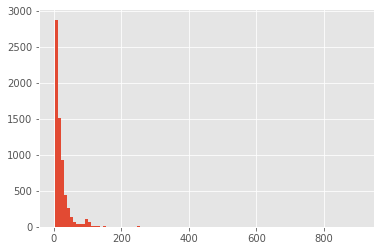

In [121]:
finaldf['len_words'].hist(bins=100);

In [122]:
!pip install -q pyLDAvis 

In [56]:
# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()

In [123]:
#to process the simple_process gensim package as input needed as string 
corpus=finaldf.trans_ticketlangue.values.tolist()

In [124]:
corpus[1]

'outlook team meeting skype meeting etc appear outlook calendar somebody please advise correct kind'

In [125]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

In [126]:
print(data_words[1])

['outlook', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [127]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [128]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [129]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

**WordCloud **

In [130]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [131]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

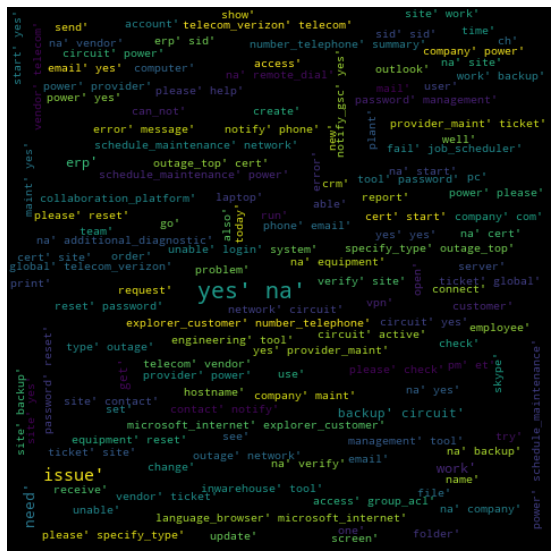

In [132]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

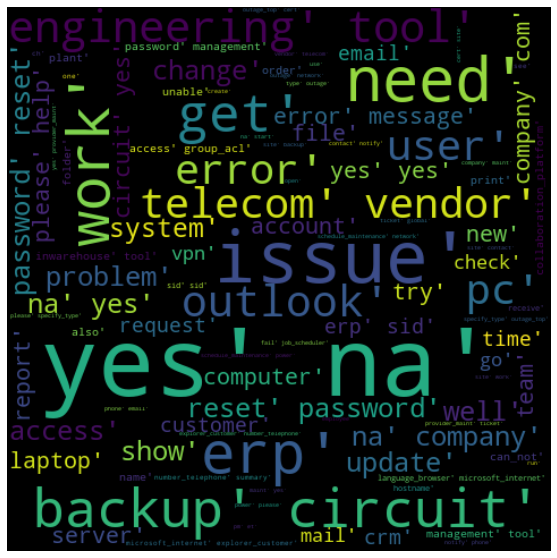

In [133]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [134]:
#Copying to new dataframe to create wordclouds on target class

new_df = finaldf.copy()
new_df['words'] = data_words_bigrams
new_df

,Assignment group,trans_ticketlangue,length,len_words,words
0,GRP_0,login issue verify user detail employee manage...,150,24,"[login, issue, verify, user, detail, employee,..."
1,GRP_0,outlook team meeting skype meeting etc appear ...,98,14,"[outlook, team, meeting, skype, meeting, etc, ..."
2,GRP_0,can not log vpn can not log vpn well,36,9,"[can_not, log, vpn, can_not, log, vpn, well]"
3,GRP_0,unable access hr tool page,26,5,"[unable, access, hr, tool, page]"
4,GRP_0,skype error,11,2,"[skype, error]"
...,...,...,...,...,...
8495,GRP_29,email come zz mail good afternoon receiving em...,76,13,"[email, come, zz_mail, good_afternoon, receivi..."
8496,GRP_0,telephony software issue,24,3,"[telephony_software, issue]"
8497,GRP_0,vip window password reset tifpdchb pedxruyf,43,6,"[vip, window, password, reset, tifpdchb, pedxr..."
8498,GRP_62,mac ne est funcionando unable access mac ne ut...,94,14,"[mac_ne, est, funcionando, unable, access, mac..."


In [135]:
#Sorting based on frequency of target class Assignment group

value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_2', 'GRP_12', 'GRP_24', 'GRP_19', 'GRP_3',
       'GRP_13', 'GRP_14', 'GRP_25', 'GRP_33', 'GRP_29', 'GRP_4', 'GRP_16',
       'GRP_18', 'GRP_10', 'GRP_9', 'GRP_6', 'GRP_7', 'GRP_34', 'GRP_26',
       'GRP_5', 'GRP_31', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15', 'GRP_42',
       'GRP_20', 'GRP_17', 'GRP_22', 'GRP_11', 'GRP_45', 'GRP_21', 'GRP_1',
       'GRP_23', 'GRP_62', 'GRP_47', 'GRP_27', 'GRP_39', 'GRP_37', 'GRP_36',
       'GRP_44', 'GRP_50', 'GRP_60', 'GRP_65', 'GRP_53', 'GRP_30', 'GRP_52',
       'GRP_51', 'GRP_55', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43', 'GRP_48',
       'GRP_32', 'GRP_66', 'GRP_63', 'GRP_68', 'GRP_38', 'GRP_58', 'GRP_56',
       'GRP_57', 'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_61', 'GRP_64',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'],
      dtype='object')

In [136]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

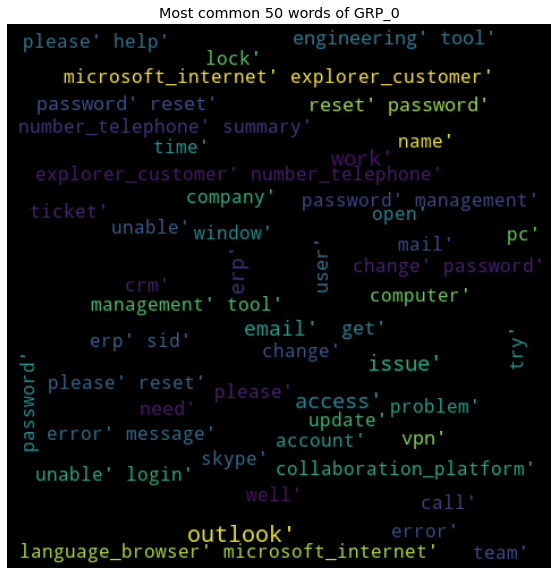

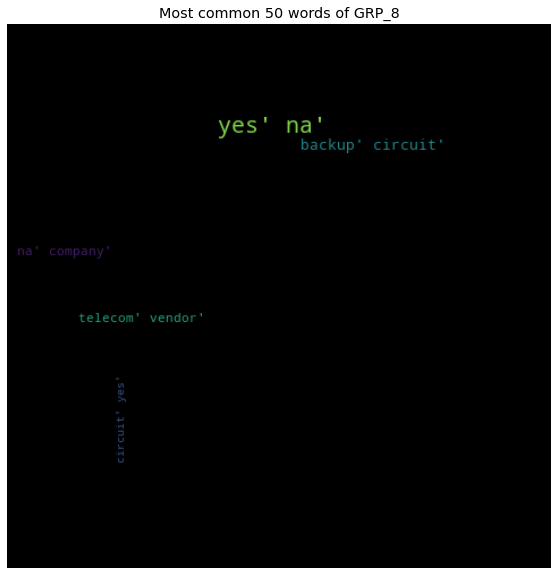

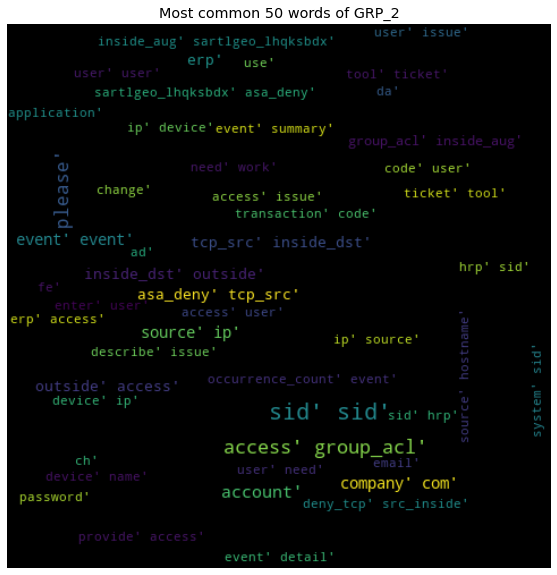

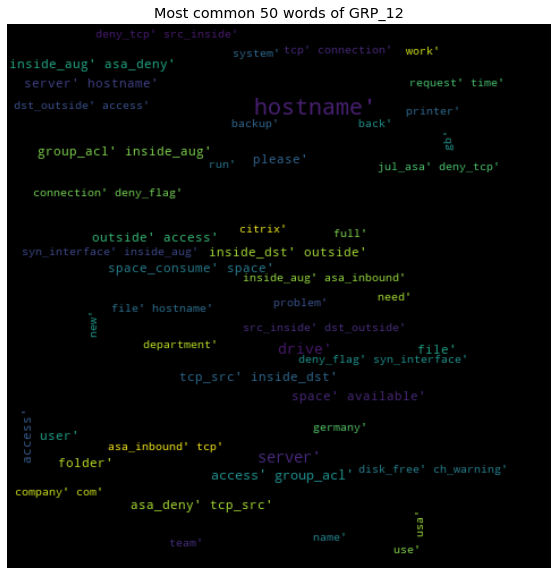

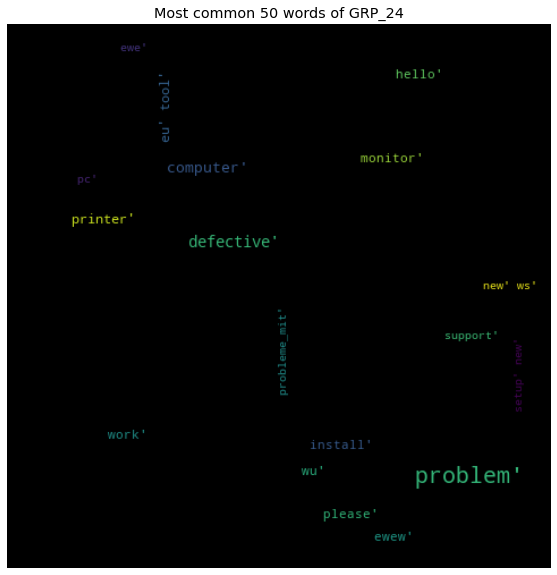

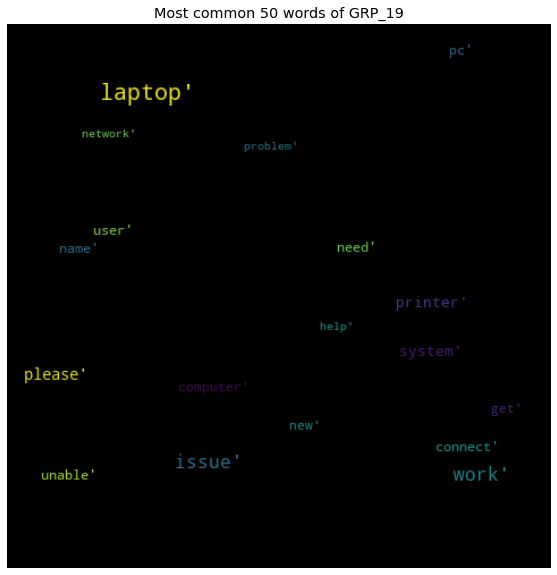

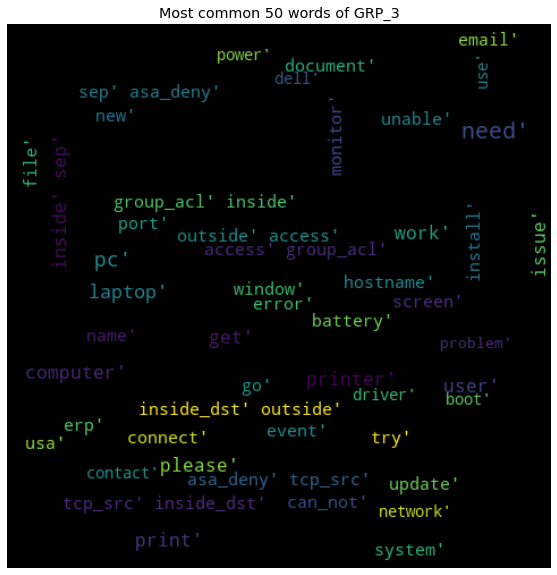

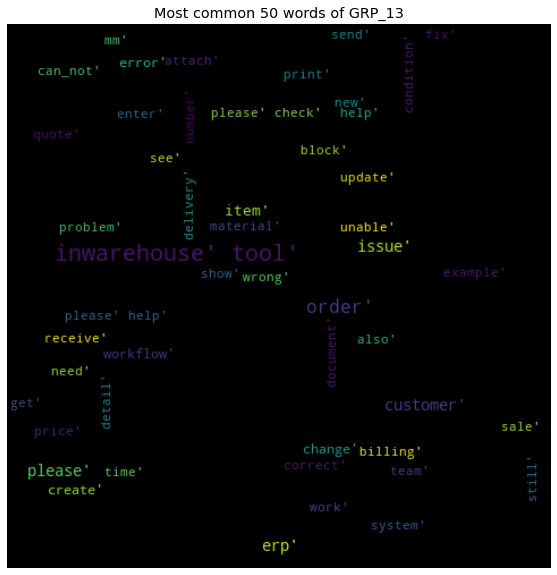

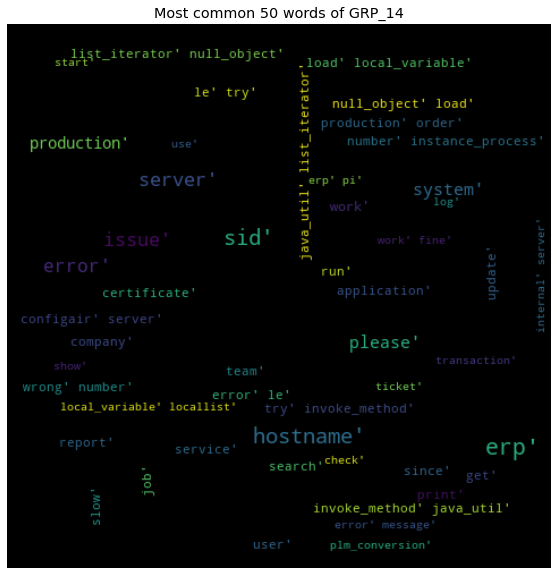

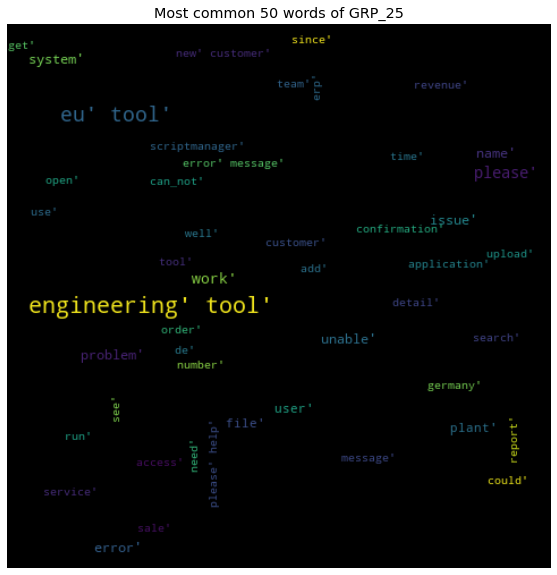

In [137]:
#for loop to pass the top 19 Assignment groups

for i in range(10):

    Grp = new_df[new_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])

In [138]:
data_cp = finaldf.copy()

In [139]:
data_cp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,6626.0,153.696348,300.560529,5.0,39.0,88.0,169.75,5749.0
len_words,6626.0,23.531995,46.157276,2.0,6.0,14.0,25.00,904.0


In [140]:
bins=[0,50,75, np.inf]
data_cp['bins']=pd.cut(data_cp.len_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data_cp.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [141]:
word_distribution

,bins,counts
0,0-100,6440
1,100-300,159
2,300-500,9
3,500-800,14
4,>800,4


Text(0.5, 1.0, 'Word distribution per bin')

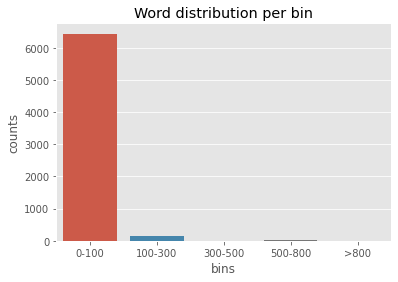

In [142]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

Most of the descrption of the problems raised by callers are short with in 0-100 words
Few items are with bit descriptive

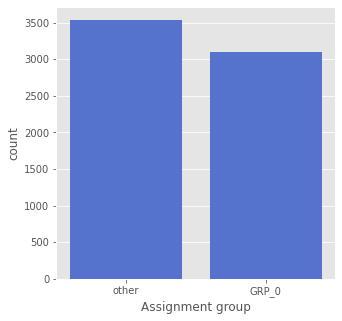

In [143]:
# Create the Dataset for classifying GRP_0
TicketGRP0DF = finaldf.copy()
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = TicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=TicketGRP0DF, color='royalblue',order=descending_order)

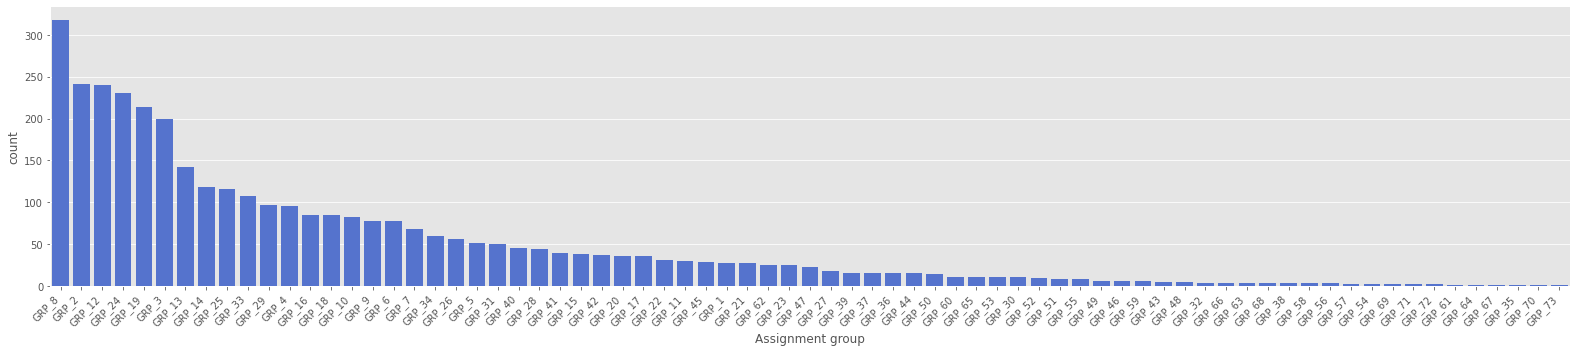

In [144]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = finaldf[finaldf['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Observation

There is high imbalance within the other group


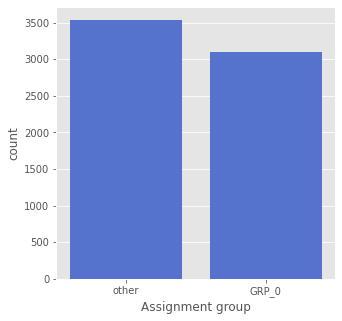

In [152]:
# Create the Dataset for classifying GRP_0
TicketGRP_50 = finaldf.copy()
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = TicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=TicketGRP0DF, color='royalblue',order=descending_order)

In [179]:
counts = itTicketOthersDF['Assignment group'].value_counts()
res = itTicketOthersDF[finaldf['Assignment group'].isin(counts[counts <= 15 ].index)]
print("Groups Less then 15 Samples: " , res['Assignment group'].value_counts().sum())
res['Assignment group'].value_counts()
uniqueless15Grp = res['Assignment group'].unique()

Groups Less then 15 Samples:  180


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [176]:
uniqueless15Grp

array(['GRP_30', 'GRP_35', 'GRP_36', 'GRP_38', 'GRP_43', 'GRP_44',
       'GRP_46', 'GRP_49', 'GRP_50', 'GRP_51', 'GRP_52', 'GRP_53',
       'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59',
       'GRP_60', 'GRP_48', 'GRP_61', 'GRP_32', 'GRP_63', 'GRP_64',
       'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69', 'GRP_70',
       'GRP_71', 'GRP_72', 'GRP_73'], dtype=object)

In [177]:
TicketGRP_50 = itTicketOthersDF.copy()
TicketGRP_50['Assignment group']=TicketGRP_50['Assignment group'].apply(lambda x : 'GRP_L15' if x in  (uniqueless15Grp)   else x)

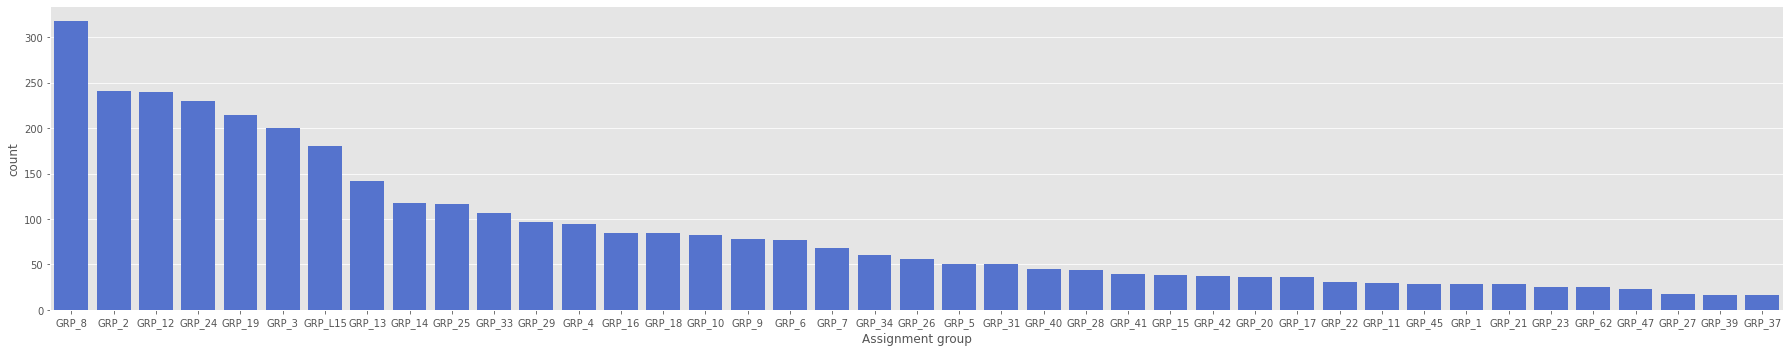

In [178]:
descending_order = TicketGRP_50['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(25,5))
sns.countplot(x='Assignment group', data=TicketGRP_50, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [184]:
maxOthers = TicketGRP_50['Assignment group'].value_counts().max()
maxOthers

318

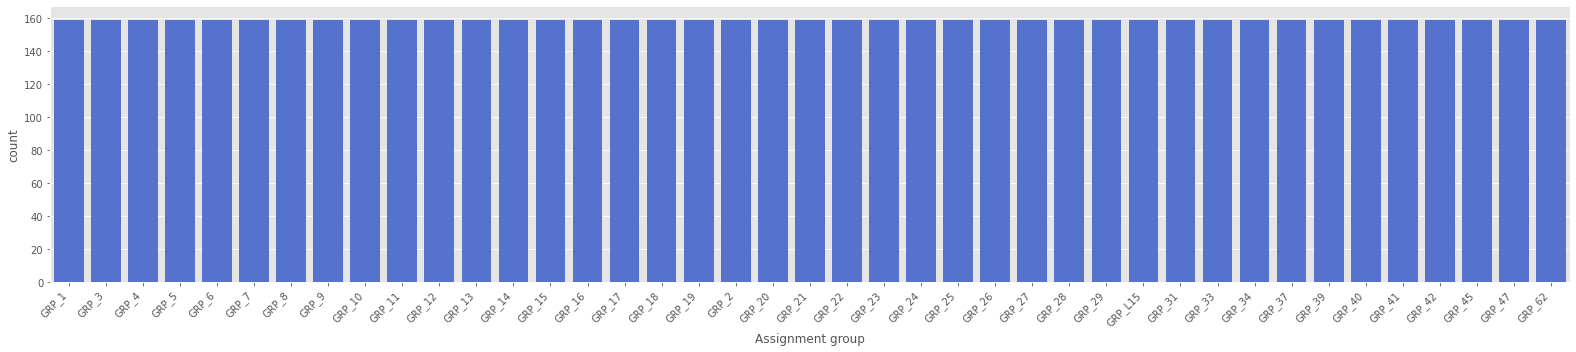

In [185]:
# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample
itTicketOthersDF_resampled = TicketGRP_50[0:0]
for grp in TicketGRP_50['Assignment group'].unique():
    itTicketGrpDF = TicketGRP_50[TicketGRP_50['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    itTicketOthersDF_resampled = itTicketOthersDF_resampled.append(resampled)

descending_order = itTicketOthersDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()